<a href="https://colab.research.google.com/github/BabeChibi/Python_colab/blob/main/data_mining_klasifikasi_naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

klasifikasi data kinerja pegawai berdasarakan pemasukan bulanan dan pengeluaran dan waktu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [62]:
data_set = pd.read_csv('employee_attrition_train.csv')
x = data_set.iloc[:,18:20].values
y = data_set.iloc[:,-13].values

In [52]:
print(x)

[[17399  6615]
 [ 4941  2819]
 [ 2679  4567]
 ...
 [ 2853  4223]
 [ 4025 23679]
 [19331 19519]]


In [63]:
print(y)

['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [65]:
print(y)

[0 0 0 ... 1 1 1]


In [66]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [67]:
print(x_train)

[[18665 25594]
 [ 6825 21173]
 [ 5673  6060]
 ...
 [ 2144  2122]
 [ 2121  9947]
 [ 2400  5530]]


In [68]:
print(x_test)

[[ 2983 18398]
 [ 5238  6670]
 [10883 20467]
 [ 4051 19658]
 [ 1118  8040]
 [ 6347 13982]
 [13269 21981]
 [ 2501 18775]
 [ 4941  2819]
 [14852 13938]
 [ 6447 15701]
 [ 2086  3335]
 [ 2302  8319]
 [ 3420 10205]
 [13191 23281]
 [ 3149 21821]
 [ 2728 21082]
 [ 6577 19558]
 [19845 25846]
 [ 1878  8059]
 [ 2756  4673]
 [10965 12066]
 [ 1904 13556]
 [ 5811 24539]
 [10739 13943]
 [ 5666 19899]
 [ 2691  7660]
 [10934 20715]
 [ 2379 19826]
 [ 9714  5323]
 [ 4969 21813]
 [10761 19239]
 [ 4148 11275]
 [ 2313  2993]
 [ 2713  6672]
 [ 2362  7568]
 [ 6586  4821]
 [ 4377 24117]
 [ 2277 22650]
 [ 5562 21782]
 [ 6244  7824]
 [ 2936  6161]
 [ 5486 24795]
 [ 2809  2725]
 [ 8853 24483]
 [ 2404  4303]
 [ 2413 18798]
 [ 4908 24252]
 [ 2342 11092]
 [ 6091 24793]
 [ 4487 12090]
 [ 5265 16439]
 [ 2194  5868]
 [ 2394 25681]
 [ 4614 23288]
 [ 2723 23231]
 [ 3968 13624]
 [ 3780 23428]
 [ 3833 24375]
 [ 4286  5630]
 [ 2422 25725]
 [ 8938 12227]
 [ 4262 22645]
 [ 2028 13637]
 [ 9525  7677]
 [ 2267 25657]
 [ 2070 25

In [69]:
print(y_train)

[1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 0 1 0 1 1 0 

In [70]:
print(y_test)

[0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1]


In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [72]:
print(x_train)

[[ 2.49251975  1.63434049]
 [ 0.05950916  1.00390823]
 [-0.17721619 -1.15119758]
 ...
 [-0.90239308 -1.7127543 ]
 [-0.90711936 -0.59691343]
 [-0.84978744 -1.2267753 ]]


In [73]:
print(x_test)

[[-7.29986330e-01  6.08194698e-01]
 [-2.66604670e-01 -1.06421190e+00]
 [ 8.93390663e-01  9.03233004e-01]
 [-5.10522200e-01  7.87870031e-01]
 [-1.11322660e+00 -8.68850625e-01]
 [-3.87154184e-02 -2.15245671e-02]
 [ 1.38369161e+00  1.11912860e+00]
 [-8.29032876e-01  6.61954698e-01]
 [-3.27635425e-01 -1.61336246e+00]
 [ 1.70898348e+00 -2.77989439e-02]
 [-1.81663426e-02  2.23603924e-01]
 [-9.14311541e-01 -1.53978114e+00]
 [-8.69925537e-01 -8.29065373e-01]
 [-6.40186869e-01 -5.60122770e-01]
 [ 1.36766333e+00  1.30450792e+00]
 [-6.95874864e-01  1.09631269e+00]
 [-7.82386474e-01  9.90931678e-01]
 [ 8.54745607e-03  7.73610084e-01]
 [ 2.73499884e+00  1.67027556e+00]
 [-9.57053619e-01 -8.66141235e-01]
 [-7.76632733e-01 -1.34898304e+00]
 [ 9.10240905e-01 -2.94745154e-01]
 [-9.51710859e-01 -8.22719419e-02]
 [-1.48858465e-01  1.48389805e+00]
 [ 8.63799993e-01 -2.70859465e-02]
 [-1.78654625e-01  8.22236504e-01]
 [-7.89989632e-01 -9.23038424e-01]
 [ 9.03870691e-01  9.38597672e-01]
 [-8.54102749e-01  8

In [74]:
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
classifer.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
y_pred = classifer.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[187   0]
 [ 71   0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


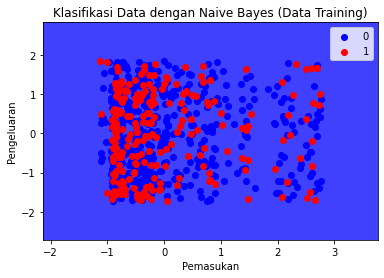

In [78]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifer.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Pemasukan')
plt.ylabel('Pengeluaran')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


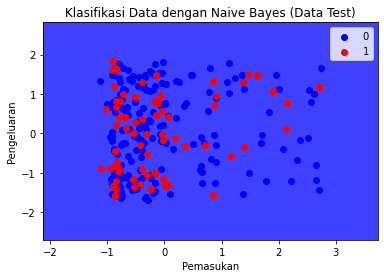

In [79]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifer.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Test)')
plt.xlabel('Pemasukan')
plt.ylabel('Pengeluaran')
plt.legend()
plt.show()